1. 학습할 데이터 준비

In [1]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels),(test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


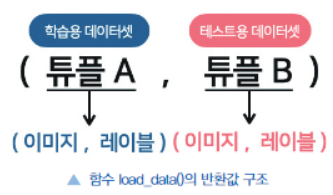

In [2]:
print(len(train_images), len(train_labels))
print(len(test_images), len(test_labels))

60000 60000
10000 10000


In [4]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

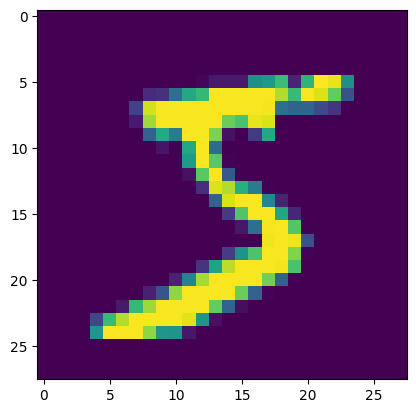

In [11]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

- 각 픽셀값 : 0~255 -> 데이터 정규화
- 각 픽셀값의 차이가 너무 크면 비교적 크기가 작은 픽셀값은 아예 무시하는 등 데이터의 중요도를 잘못 해석할 수 있음

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

2. 모델 구성

In [26]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                                 keras.layers.Dense(512, activation=tf.nn.relu),
                                 #keras.layers.Dense(256, activation=tf.nn.relu),
                                 keras.layers.Dense(10, activation=tf.nn.softmax)])

1) Flatten : 입력 데이터 변환(2차원 -> 1차원 배열)

2) Dense : 입력값과 출력값이 모두 연결된 형태의 레이어
- 512 : 레이어를 구성하는 노드의 개수

3) 출력값 결정(0~9) -> 10개의 노드
- 가장 큰 확률의 노드값을 1로, 나머지는 0으로 변환

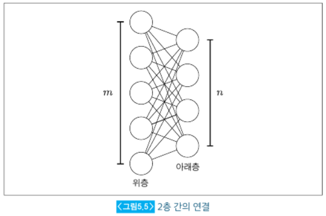

In [27]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

- compile : 학습 방식에 대한 설정

1) 손실함수(loss) : 현재의 추측이 좋은 추측인지 아닌지 파악

2) 최적화 함수(optimizer) : 손실 함수 최소화 과정에 사용


3. 학습하기

In [28]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2030
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0809
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0522
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0372
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0270


In [29]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0567


0.0567312017083168

4. 훈련된 모델을 통한 예측

313/313 [==============================] - 1s 4ms/step
[6.6748136e-05 7.4734935e-08 2.0427937e-05 2.7616048e-07 1.0994013e-05
 4.0328800e-05 9.9984813e-01 4.9675714e-07 1.2316680e-05 3.8980281e-07]


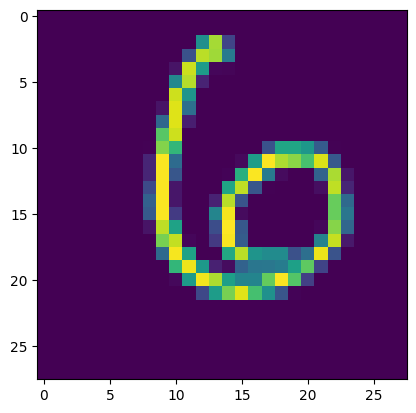

In [17]:
classification = model.predict(test_images)
print(classification[100])
plt.imshow(test_images[100])